In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [ ]:
#x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [ ]:
print(x_train)
print(x_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  
0   

In [ ]:
def scale_datasets(x_train, x_test):

  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()
print(model)

# Compile the model
model.compile(loss=MeanSquaredLogarithmicError(), optimizer=Adam(), metrics=[MeanSquaredLogarithmicError()])

# Train the model
history=model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
170/170 [==============================] - 3s 10ms/step - loss: 45.3324 - mean_squared_logarithmic_error: 45.3324 - val_loss: 17.0553 - val_mean_squared_logarithmic_error: 17.0485
Epoch 2/10
170/170 [==============================] - 1s 7ms/step - loss: 11.1522 - mean_squared_logarithmic_error: 11.1522 - val_loss: 7.1287 - val_mean_squared_logarithmic_error: 7.1237
Epoch 3/10
170/170 [==============================] - 1s 7ms/step - loss: 5.1392 - mean_squared_logarithmic_error: 5.1392 - val_loss: 3.6131 - val_mean_squared_logarithmic_error: 3.6092
Epoch 4/10
170/170 [==============================] - 1s 7ms/step - loss: 2.7468 - mean_squared_logarithmic_error: 2.7468 - val_loss: 2.0293 - val_mean_squared_logarithmic_error: 2.0262
Epoch 5/10
170/170 [==============================] - 1s 7ms/step - loss: 1.6050 - mean_squared_logarithmic_error: 1.6050 - val_loss: 1.2356 - val_mean_squared_logarithmic_error: 1.2330
Epoch 6/10
170/170 [==============================] - 1s 8ms/st

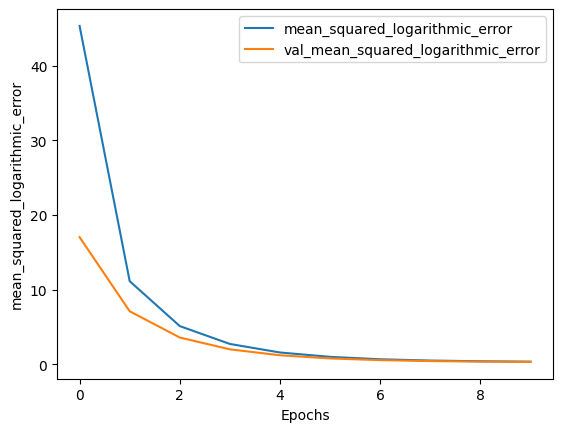

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
x_test['prediction'] = model.predict(x_test_scaled)
print(x_test)

94/94 [==============================] - 0s 2ms/step
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      popu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate some random data for demonstration purposes
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Build the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=10)

# Predict on some new data
new_data = np.random.rand(5, 2)
predictions = model.predict(new_data)
print(predictions)

Epoch 1/10
10/10 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 112ms/step
[[0.4995673]
 [0.4995673]
 [0.4995673]
 [0.4995673]
 